In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    @staticmethod
    def _build_dataset(path):
        structure = [('entrada', np.float),
                     ('salida', np.float)]

        with open(path, encoding="utf8") as data_csv:
            data_gen = ((float(line.split(',')[0]), float(line.split(',')[1]))
                        for i, line in enumerate(data_csv) if i != 0)
            data = np.fromiter(data_gen, structure)

        return data

    def split(self, percentage):  # 0.8
        X = self.dataset['entrada']
        y = self.dataset['salida']

        # X.shape[0] -> 10 (filas)

        permuted_idxs = np.random.permutation(X.shape[0])
        # 2,1,3,4,6,7,8,5,9,0

        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]
        # permuted_idxs[0:8]
        # [2,1,3,4,5,6,7,8,5]

        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]
        # [9,0]

        X_train = X[train_idxs]
        X_test = X[test_idxs]

        y_train = y[train_idxs]
        y_test = y[test_idxs]

        return X_train, X_test, y_train, y_test, X,y

In [39]:
dataset = Data(r'clase_8_dataset.csv')
X_train, X_test, y_train, y_test,X,y = dataset.split(0.8)

Nube de puntos de todo el dataset


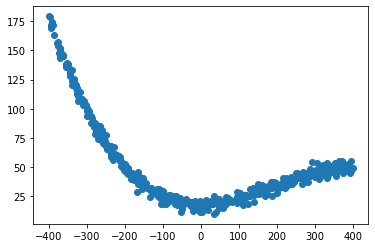

In [47]:
print("Nube de puntos de todo el dataset")
plt.scatter(X, y)

Nube de puntos del Train


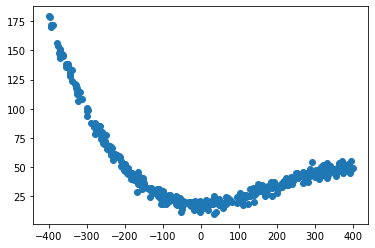

In [48]:
print("Nube de puntos del Train")
plt.scatter(X_train, y_train)

In [54]:
class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented
    
class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n


In [126]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented
    
class ConstantModel(BaseModel):

    def fit(self, X, Y):
        W = Y.mean()
        self.model = W

    def predict(self, X):
        return np.ones(len(X)) * self.model


#expandimos nuestro dataset original y le agregamos una columna de unos, lo que hacemos es que al calcular el W con la regresion afin, obtenemos la ordenada al origen
class LinearRegressionWithB(BaseModel):

    def fit(self, X, y):
        X_expanded = np.vstack((X, np.ones(len(X)))).T   #agrega una columna de unos
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)  #acá sí hace falta invertir
        self.model = W

    def predict(self, X):
        X_expanded = np.vstack((X, np.ones(len(X)))).T #la tiene que volver a expandir
        return X_expanded.dot(self.model)



    
    

In [129]:
X_quadratic = np.vstack((np.power(X_train, 2), X_train, np.ones(len(X_train)))).T
y_quadratic = np.vstack((np.power(X_train, 2), X_train, np.ones(len(X_train)))).T


#X_quadratic = np.power(X_train, 2)
#y_quadratic = np.power(y_train, 2)

X_cubic = np.power(X_train, 3)
y_cubic = np.power(y_train, 3)

X_cuarta = np.vstack((np.power(X_train, 4), X_train, np.ones(len(X_train)))).T
y_cuarta = np.vstack((np.power(y_train, 4), y_train, np.ones(len(y_train)))).T

(400,)

In [93]:
def k_folds(X_train, y_train, k=5):
    l_regression_b = LinearRegressionWithB()
    error = MSE()                               #esta es la métrica que voy a usar para comparar

    chunk_size = int(len(X_train) / k)
    mse_list = []
    for i in range(0, len(X_train), chunk_size):
        end = i + chunk_size if i + chunk_size <= len(X_train) else len(X_train)
        
        #un chunk de train va a ser de validacion
        new_X_valid = X_train[i: end]
        new_y_valid = y_train[i: end]
        
        #el resto de los chunks
        new_X_train = np.concatenate([X_train[: i], X_train[end:]])
        new_y_train = np.concatenate([y_train[: i], y_train[end:]])

        l_regression_b.fit(new_X_train, new_y_train)
        prediction = l_regression_b.predict(new_X_valid)
        mse_list.append(error(new_y_valid, prediction))

    mean_MSE = np.mean(mse_list)

    return mean_MSE

In [121]:
print(k_folds(X_train,y_train))
print(k_folds(X_quadratic,y_quadratic))
print(k_folds(X_cubic,y_cubic))
#k_folds(X_cubic,y_cubic)

842.6726275686431
19107005.550770063
447396415002.1154


In [85]:
#def f(X):
#    return .5 * X + np.sqrt(np.max(X, 0)) - np.cos(X) + 2

In [ ]:
#CADA VEZ QUE CORRO AJUSTO A UN NUEVO MODELO. USO 20 DATOS
# EL DE GRADO 5 TIENE MUCHA VARIANZA, AL AJUSTARSE DEMASIADO A LOS DATOS. 

def f_hat(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

N = X_train.shape[0]
n = int(.02 * N)
xx_test = 3.2
yy_test = f(xx_test)
x_range = np.linspace(-500, 500, 100)
colors = np.array(['tab:green', 'tab:purple', 'tab:cyan', 'tab:orange'])

# Polinomios
d_arr = [2, 3, 4]

cnt = 1
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(15, 9))
for i in range(1):
    for j in range(3):
        w = []
        idx = np.random.permutation(N)[:n]
        xx_train, yy_train = X_train[idx], y_train[idx]
        
        for d in d_arr:
            w.append(np.polyfit(xx_train, yy_train, d))
                
                
        axs[i, j].scatter(xx_train, yy_train)
        axs[i, j].plot(x_range, f(x_range), 'r', linewidth=3.0)
        for k in range(len(w)):
            axs[i, j].plot(x_range, f_hat(x_range, w[k]), colors[k], linewidth=3.0)
            
        axs[i, j].scatter(xx_test, yy_test, c='r')
        for k in range(len(w)):
            axs[i, j].scatter(xx_test, f_hat(xx_test, w[k]), c=colors[k])
                
        axs[i, j].set_xlabel('x', size=12)
        axs[i, j].set_ylabel('y', size=12)
        axs[i, j].legend([r'$f$',r'$\hat{f}$ (d = 2)', r'$\hat{f}$ (d = 3)', 
                          r'$\hat{f}$ (d = 5)'], fontsize=12)
        axs[i, j].title.set_text('Experimento N° {}'.format(cnt))
        cnt += 1
plt.tight_layout()
plt.show()

#ajustamos el modelo a los puntos. Ver que d = 5 tiene mucha varianza. Es dificil royectar